In [19]:
import csv
import pandas as pd
from pathlib import Path

In [17]:
# open dataset taken from Kaggle and put it in a dataframe with pandas
# keep columns id, review, language and score
df = pd.read_csv('user_reviews_g2.csv', usecols=[0,1,4,7])

# show the first ten lines
df.head(10)
# Note that a review classified as Russian is written in English! Because of this, some elements may be lost

,id,review,language,score
0,Maksim_ON,"Продовження культової серії, було зіпсоване че...",Ukrainian,2
1,Araset,"Well, it's most definetly sheeet and peess and...",English,1
2,realistyalanci,"Pathetic.,Disappointment. Inconsistency.,Cring...",English,0
3,Cliente,A maior traição que eu já vi na minha vida do ...,Portuguese,0
4,wingZero21,I really enjoyed the first game. It was a 10/1...,English,6
5,echo360calix,This game is a very sad destruction of an amaz...,English,0
6,winchesterpro,"Bruce Straley, come back to Naughty Dog, they ...",Russian,5
7,sa674,"It’s a different game from part one, not bad o...",English,2
8,bruhgamer,"Best gameplay, graphics, combat and definitely...",English,0
9,nicolaibo,"A story of right and wrong, written by a guy w...",English,2


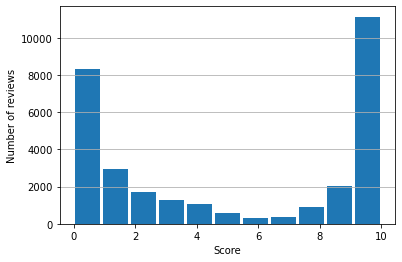

In [52]:
# Histogram for score repartition
df.hist(grid=False, column='score', bins=11, rwidth=0.9)

plt.title('')
plt.xlabel('Score')
plt.ylabel('Number of reviews')
plt.grid(axis='y')

In [18]:
# Select only English reviews
df_eng = df.loc[df['language'] == 'English']
# show the first fifteen lines
df_eng.head(15)

,id,review,language,score
1,Araset,"Well, it's most definetly sheeet and peess and...",English,1
2,realistyalanci,"Pathetic.,Disappointment. Inconsistency.,Cring...",English,0
4,wingZero21,I really enjoyed the first game. It was a 10/1...,English,6
5,echo360calix,This game is a very sad destruction of an amaz...,English,0
7,sa674,"It’s a different game from part one, not bad o...",English,2
8,bruhgamer,"Best gameplay, graphics, combat and definitely...",English,0
9,nicolaibo,"A story of right and wrong, written by a guy w...",English,2
11,DenisRus,"Visually excellent, but terrible at the core. ...",English,1
12,RUB3n172,One of the best Games I have ever played. I ca...,English,0
13,lehaninh,"Out of 100s games I have played since I was 7,...",English,10


In [11]:
# There are duplicates (here 13 and 15) that we want to delete
df_eng_nodup = df_eng.drop_duplicates(subset=None, keep='first', inplace=False)
# show the first fifteen lines to see that the duplicate has been deleted
print(df_eng_nodup.head(15))

                id                                             review  \
1           Araset  Well, it's most definetly sheeet and peess and...   
2   realistyalanci  Pathetic.,Disappointment. Inconsistency.,Cring...   
4       wingZero21  I really enjoyed the first game. It was a 10/1...   
5     echo360calix  This game is a very sad destruction of an amaz...   
7            sa674  It’s a different game from part one, not bad o...   
8        bruhgamer  Best gameplay, graphics, combat and definitely...   
9        nicolaibo  A story of right and wrong, written by a guy w...   
11        DenisRus  Visually excellent, but terrible at the core. ...   
12        RUB3n172  One of the best Games I have ever played. I ca...   
13        lehaninh  Out of 100s games I have played since I was 7,...   
14         jj98891  Simply the best game of the generation and one...   
16            YSZM  When a director/writer has to defend and expla...   
17         Caracal  After great and one of the best

In [16]:
# See length of file (compared to the one with duplicates)
print('Length of original file:', len(df))
print('Number of English reviews:', len(df_eng))
print('Number of English reviews without duplicates:', len(df_eng_nodup))

Length of original file: 30665
Number of English reviews: 24209
Number of English reviews without duplicates: 24200


In [17]:
# Create two new dataframes with reviews rated 0 and 10
df_neg = df_eng_nodup.loc[df['score'] == 0]
df_pos = df_eng_nodup.loc[df['score'] == 10]

print('Number of negative reviews:', len(df_neg))
print('Number of positive reviews:', len(df_pos))

Number of negative reviews: 6893
Number of positive reviews: 8120


In [18]:
# It makes a total of 15013 reviews out of the 24200 so it is a significant loss, 
# but moderate reviews are not what is aimed for

# show first five lines of negative reviews
df_neg.head(5)

,id,review,language,score
2,realistyalanci,"Pathetic.,Disappointment. Inconsistency.,Cring...",English,0
5,echo360calix,This game is a very sad destruction of an amaz...,English,0
8,bruhgamer,"Best gameplay, graphics, combat and definitely...",English,0
12,RUB3n172,One of the best Games I have ever played. I ca...,English,0
28,Razyel,"Uncharacterized characters, horrible and poorl...",English,0


In [19]:
#show first five lines of positive reviews
df_pos.head(5)

,id,review,language,score
13,lehaninh,"Out of 100s games I have played since I was 7,...",English,10
14,jj98891,Simply the best game of the generation and one...,English,10
19,JDgamer,"As a fan of the tlou game series, I expected m...",English,10
20,Topiq,"Special register to write a review.,,It is a m...",English,10
21,ISZATSO,"Honestly, after seeing all the hate surroundin...",English,10


In [21]:
# Transform both dataframes in two strings containing only the reviews' content
# And separate each review's content with a new line
neg_str = '\n'.join(df_neg['review'].tolist())
pos_str = '\n'.join(df_pos['review'].tolist())

In [22]:
# save both strings to two different .txt files named neg_reviews.txt and pos_reviews.txt
neg_reviews = open("neg_reviews.txt", "wt", encoding="utf8")
neg_reviews.write(neg_str)
neg_reviews.close()

pos_reviews = open("pos_reviews.txt", "wt", encoding="utf8")
pos_reviews.write(pos_str)
pos_reviews.close()